In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 3 (Telecom Customer Churn)/Dataset/Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## Problem Statement:
# The goal is to predict whether a telecom customer will churn based on their demographic, service usage, and billing information

## Features and Target:

# Target Variable - churn -> Indicates whether the customer has left the service (Yes or No). This is what we want to predict.

# Features - other than churn all are features

In [ ]:
# drop column named 'customerID' which is not useful
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##EDA - exploratory data analysis

In [ ]:
# Convert the column 'TotalCharges' to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.shape

(7043, 20)

In [ ]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
## Observations
#  16.2% of customers are senior citizens
#  Tenure ranges from 0 to 72 months
#  MonthlyCharges is suggesting a slightly left-skewed distribution (more customers paying less)
#  TotalCharges is indicating a right-skewed distribution

In [ ]:
data.describe(include=['O'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
## % of null values
data.isna().sum()/len(data)

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000


## Univariate Analysis

In [ ]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  print()


def catg_disc_analysis(data,col):
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

Non Visual Analysis
count     7043.00
min          0.00
max         72.00
mean        32.37
median      29.00
var        603.17
std         24.56
skew         0.24
kurt        -1.39
Name: tenure, dtype: float64

Visual Analysis


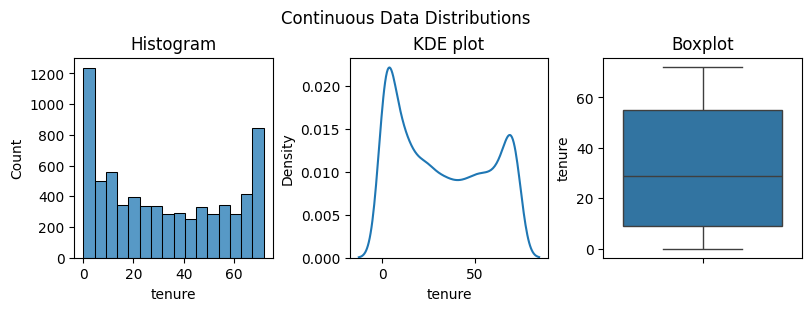

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'tenure')
print("Visual Analysis")
cont_vis_analysis(data,'tenure')

In [ ]:
## Observations in "tenure"
# 1. There are no outliers in tenure data
# 2. KDE plot of tenure is a platykurtic distribution
# 3. Tenure distribution is slightly right-skewed

Non Visual Analysis
count     7043.00
min         18.25
max        118.75
mean        64.76
median      70.35
var        905.41
std         30.09
skew        -0.22
kurt        -1.26
Name: MonthlyCharges, dtype: float64

Visual Analysis


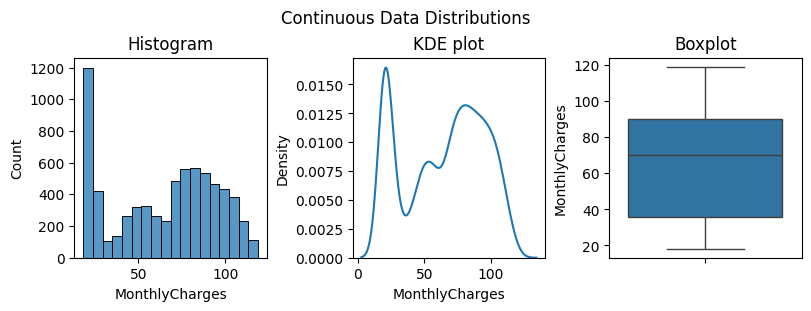

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'MonthlyCharges')
print("Visual Analysis")
cont_vis_analysis(data,'MonthlyCharges')

In [ ]:
## Observations in "MonthlyCharges"
# 1. There are no outliers in MonthlyCharges data
# 2. KDE plot of MonthlyCharges is a platykurtic distribution
# 3. MonthlyCharges distribution is left-skewed

Non Visual Analysis
count        7032.00
min            18.80
max          8684.80
mean         2283.30
median       1397.48
var       5138252.41
std          2266.77
skew            0.96
kurt           -0.23
Name: TotalCharges, dtype: float64

Visual Analysis


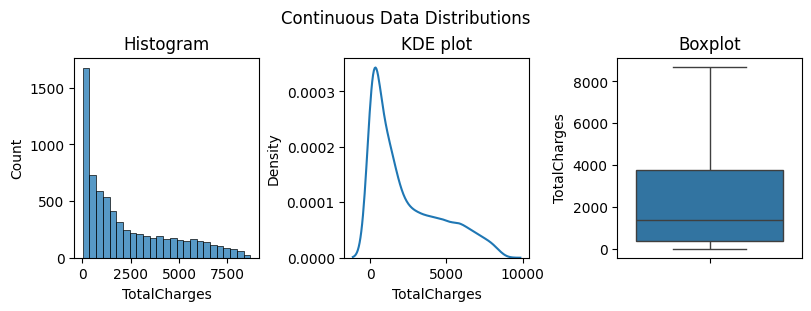

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'TotalCharges')
print("Visual Analysis")
cont_vis_analysis(data,'TotalCharges')

In [ ]:
## Observations in "TotalCharges"
# 1. There are no outliers in TotalCharges data
# 2. KDE plot of TotalCharges is a platykurtic distribution
# 3. TotalCharges distribution is right-skewed

In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Value Counts for  gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
Null values = 0


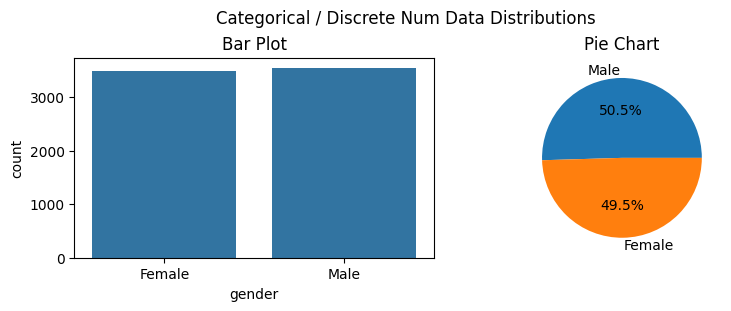

In [ ]:
catg_disc_analysis(data,'gender')

Value Counts for  SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Null values = 0


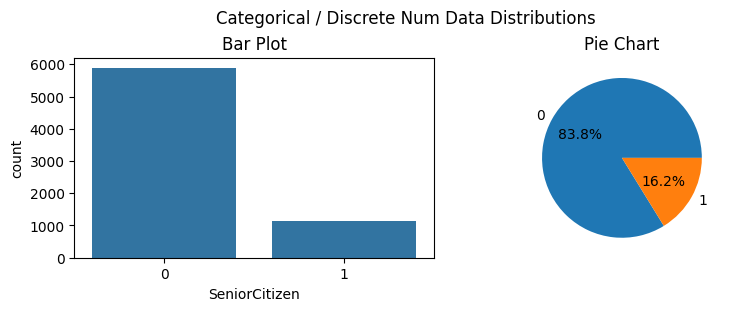

In [ ]:
catg_disc_analysis(data,'SeniorCitizen')

Value Counts for  PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Null values = 0


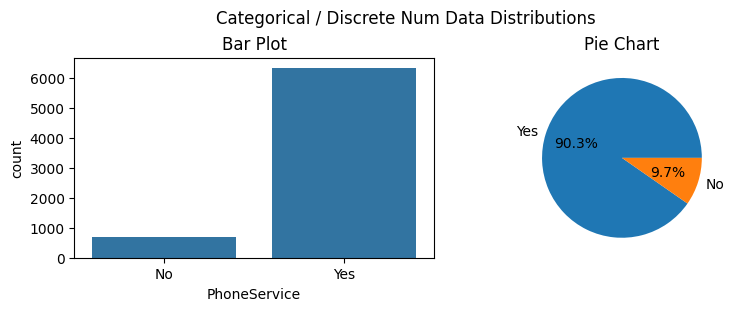

In [ ]:
catg_disc_analysis(data,'PhoneService')

Value Counts for  MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Null values = 0


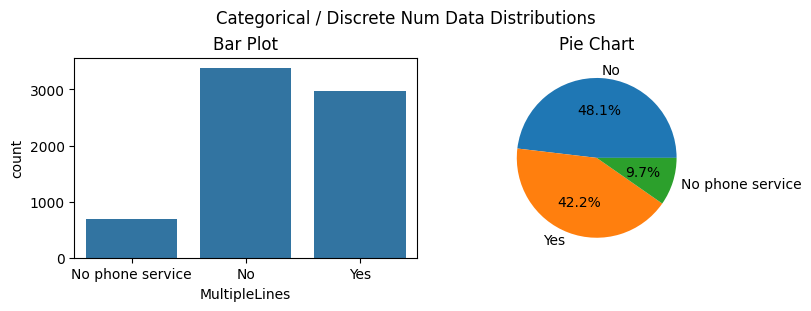

In [ ]:
catg_disc_analysis(data,'MultipleLines')

Value Counts for  InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Null values = 0


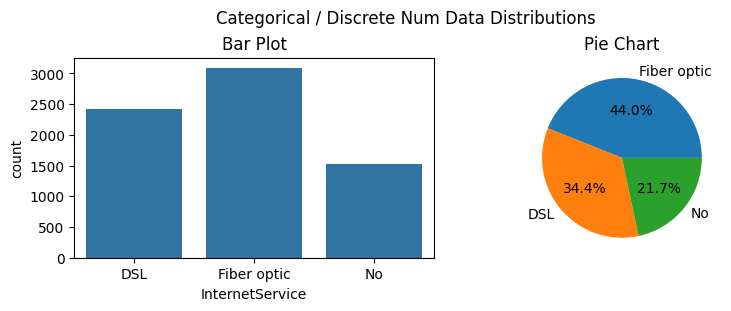

In [ ]:
catg_disc_analysis(data,'InternetService')

Value Counts for  OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Null values = 0


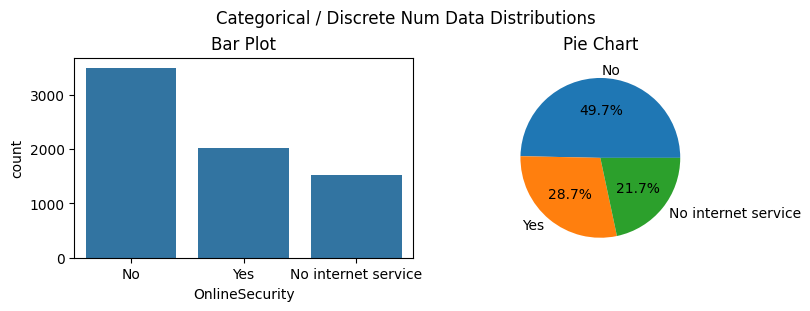

In [ ]:
catg_disc_analysis(data,'OnlineSecurity')

Value Counts for  OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Null values = 0


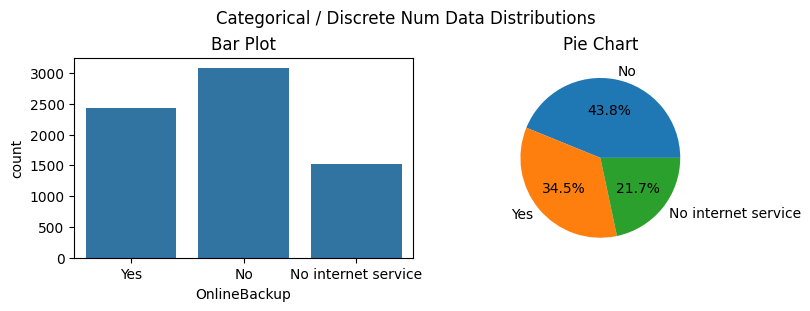

In [ ]:
catg_disc_analysis(data,'OnlineBackup')

Value Counts for  DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
Null values = 0


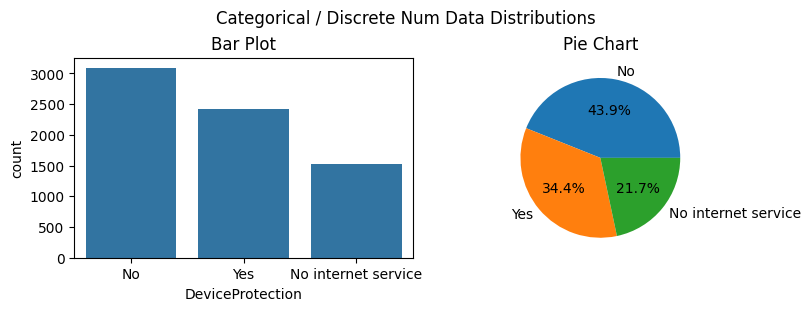

In [ ]:
catg_disc_analysis(data,'DeviceProtection')

Value Counts for  TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
Null values = 0


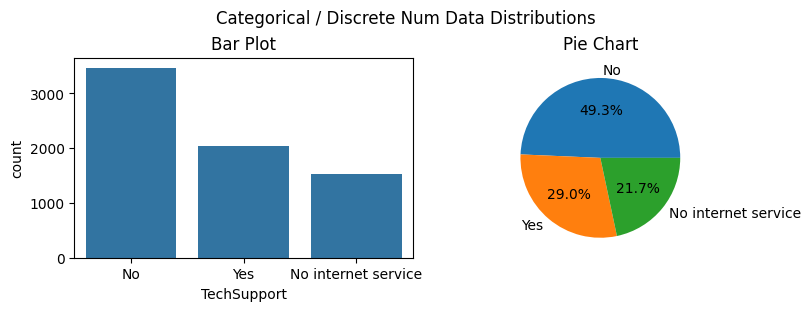

In [ ]:
catg_disc_analysis(data,'TechSupport')

Value Counts for  StreamingTV
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
Null values = 0


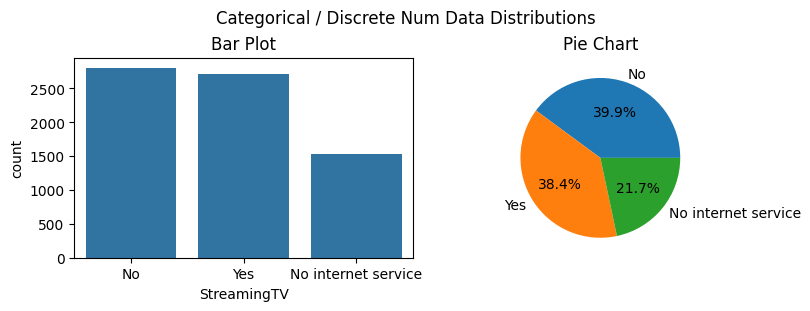

In [ ]:
catg_disc_analysis(data,'StreamingTV')

Value Counts for  StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
Null values = 0


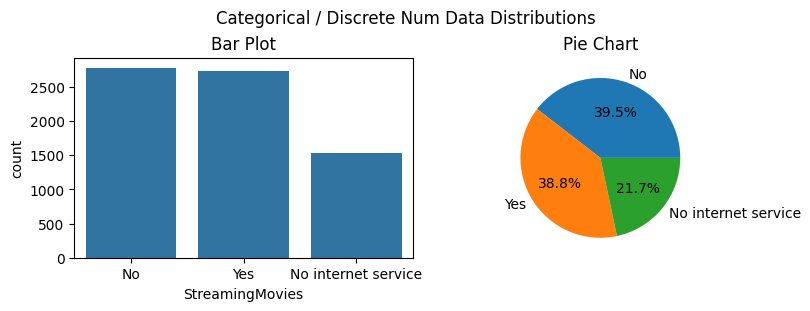

In [ ]:
catg_disc_analysis(data,'StreamingMovies')

Value Counts for  Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Null values = 0


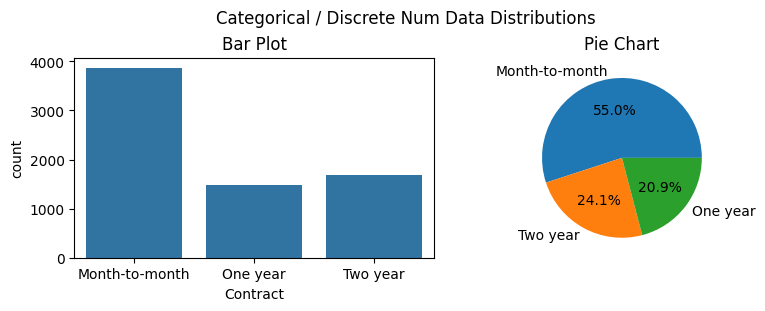

In [ ]:
catg_disc_analysis(data,'Contract')

Value Counts for  PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Null values = 0


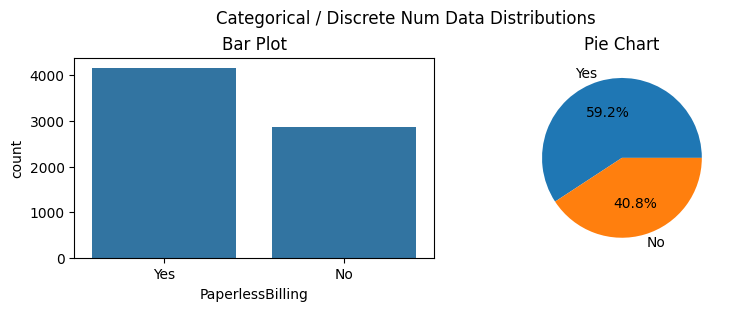

In [ ]:
catg_disc_analysis(data,'PaperlessBilling')

Value Counts for  PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Null values = 0


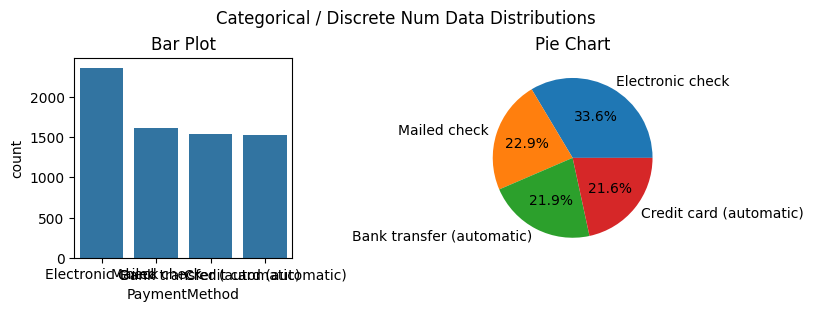

In [ ]:
catg_disc_analysis(data,'PaymentMethod')

Value Counts for  Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Null values = 0


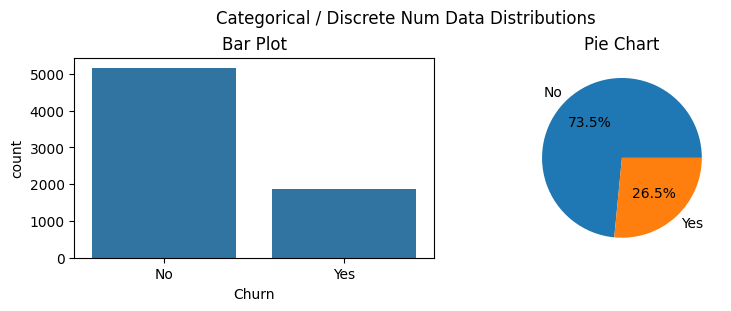

In [ ]:
catg_disc_analysis(data,'Churn')

## Bivariate Analysis

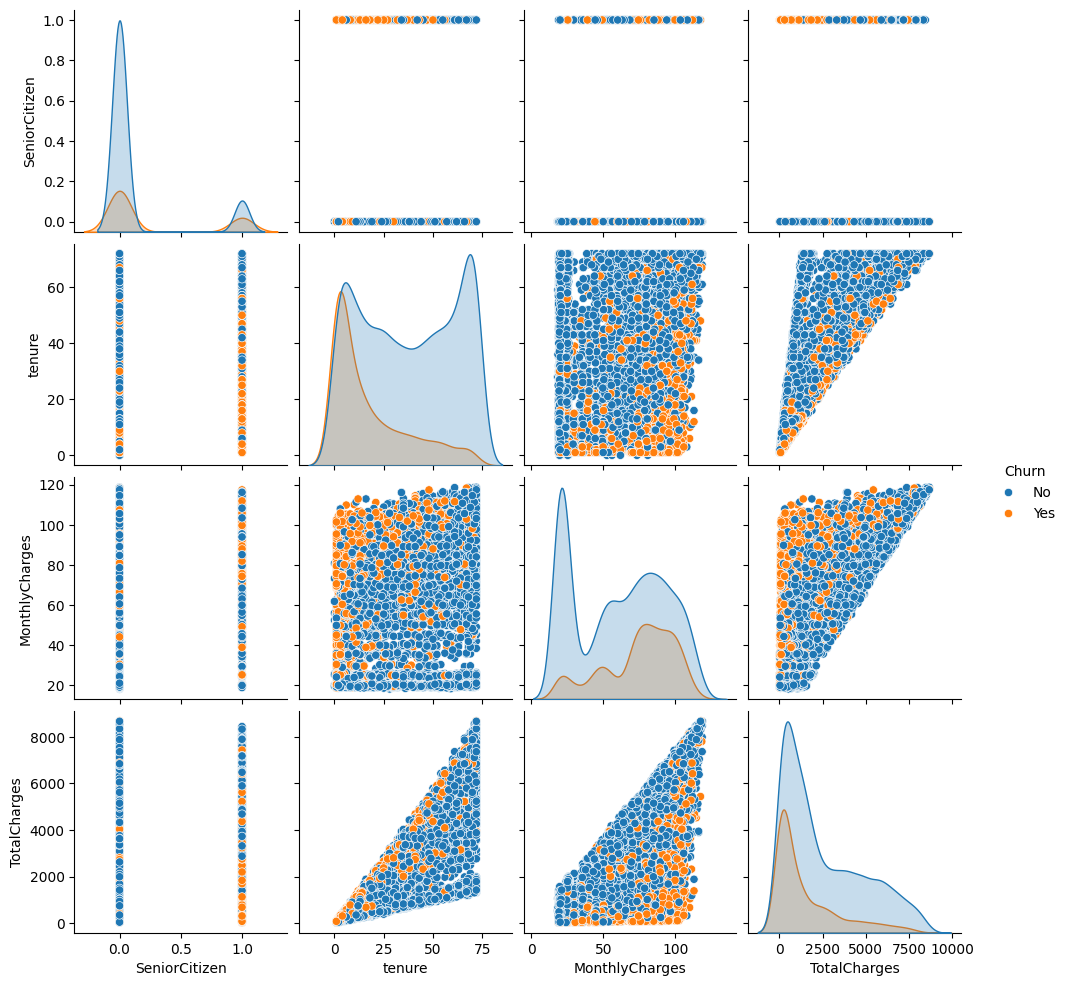

In [ ]:
sns.pairplot(data, hue='Churn')

In [ ]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(3,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

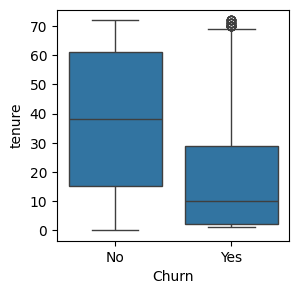

In [ ]:
cont_cat_bivar_analysis(data,'Churn','tenure')

In [ ]:
## Observations
#  There are some outliers present while plotting boxplot tenure vs Churn
#  Most churners leave within their first year

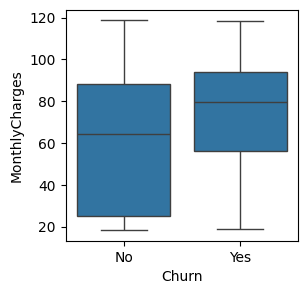

In [ ]:
cont_cat_bivar_analysis(data,'Churn','MonthlyCharges')

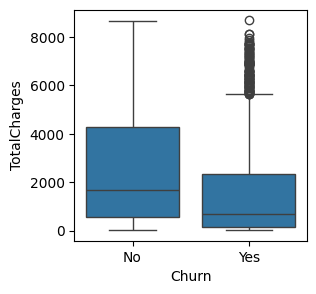

In [ ]:
cont_cat_bivar_analysis(data,'Churn','TotalCharges')

In [ ]:
## Observations
#  There are outliers present in TotalCharges plot vs Churn
#  There median of TotalCharges whose Churn is Yes less than Churn No
#  This info might be wrong due to more outliers present in Churn Yes

In [ ]:
## cat - cat bivariate
def cat_cat_bivar_analysis(data,col1,col2):
  ct_data=pd.crosstab(data[col1],data[col2])
  ct_data.plot(kind='bar')

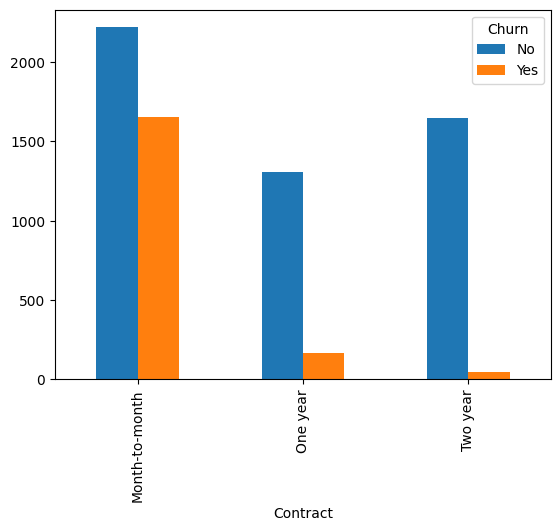

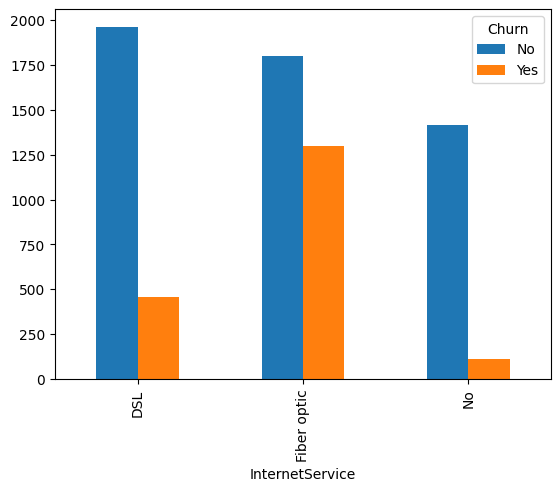

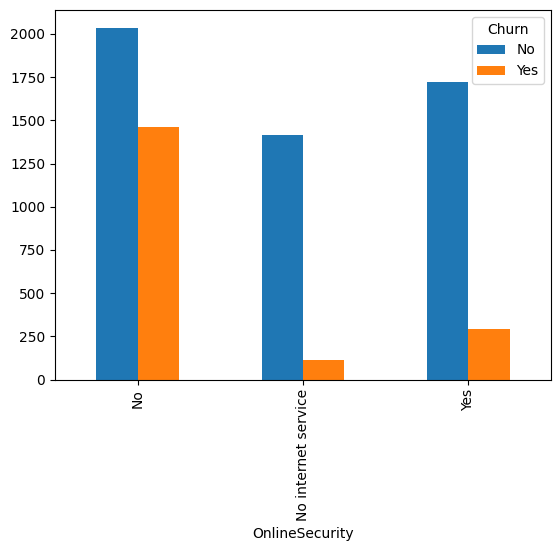

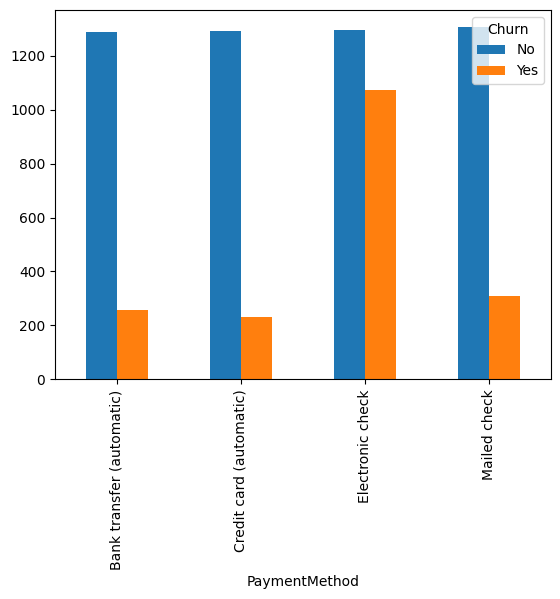

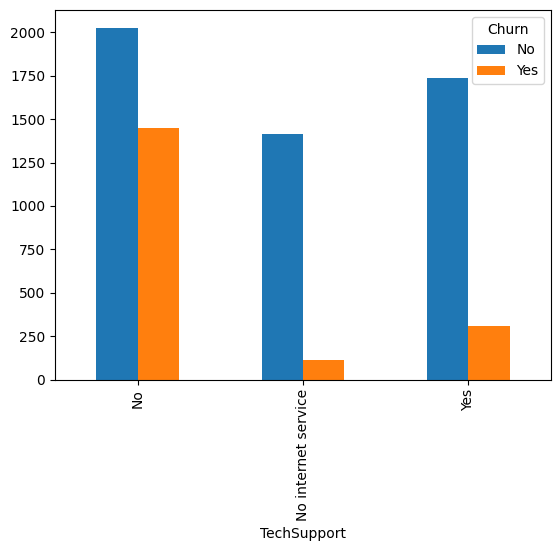

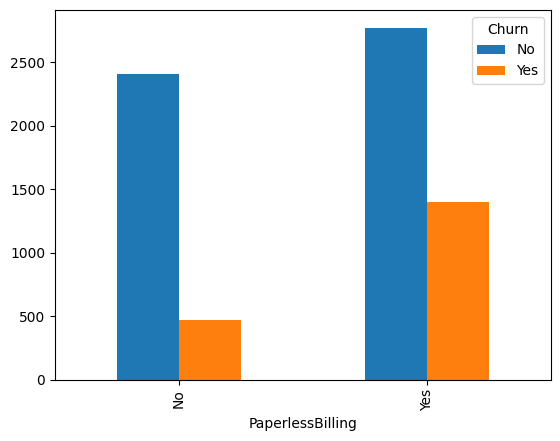

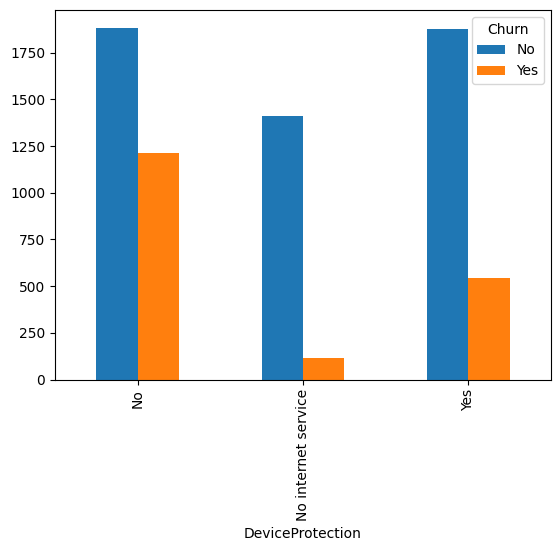

In [ ]:
categorical_cols = [
    'Contract', 'InternetService', 'OnlineSecurity',
    'PaymentMethod', 'TechSupport','PaperlessBilling', 'DeviceProtection'
]

for col in categorical_cols:
    cat_cat_bivar_analysis(data, col, 'Churn')

## Data Preprocessing

In [ ]:
# There are 11 null values in Total Charges
# So drop the rows which has less affect on total data
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## duplicates check
data.duplicated().sum()

np.int64(22)

In [ ]:
## remove duplicate rows from data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(7010, 20)

## Label Encoding

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of original data
data_encoded = data.copy()

# Columns that require Label Encoding
cols_to_encode = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Apply Label Encoding
label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le


data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Train_Test_Split

In [ ]:
# Using features predict Churn is Yes or No
x=data_encoded.drop('Churn',axis=1) ## features
y=data_encoded['Churn'] ## target
x.shape,y.shape

((7010, 19), (7010,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5608, 19), (1402, 19), (5608,), (1402,))

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1328,0,0,1,0,23,1,0,0,0,0,2,2,0,0,0,0,2,54.25,1221.55
5716,1,0,0,1,2,1,0,0,0,0,0,0,0,2,0,1,2,55.30,108.65
1906,1,0,0,0,40,0,1,0,0,2,0,2,0,0,1,0,1,36.00,1382.90
6687,0,1,1,0,2,1,2,1,0,0,2,0,0,0,0,0,2,79.20,172.85
1880,1,0,0,0,2,1,2,1,0,0,0,0,0,2,0,1,2,86.00,165.45


## Standard Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Transform the testing data using the fitted scaler
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1328,0,0,1,0,0.309859,1,0,0,0,0,2,2,0,0,0,0,2,0.358209,0.138790
5716,1,0,0,1,0.014085,1,0,0,0,0,0,0,0,2,0,1,2,0.368657,0.010368
1906,1,0,0,0,0.549296,0,1,0,0,2,0,2,0,0,1,0,1,0.176617,0.157408
6687,0,1,1,0,0.014085,1,2,1,0,0,2,0,0,0,0,0,2,0.606468,0.017776
1880,1,0,0,0,0.014085,1,2,1,0,0,0,0,0,2,0,1,2,0.674129,0.016922


## ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the classifier
classifier = LogisticRegression(random_state=42)

# 1. Train the model on scaled training data
classifier.fit(X_train, y_train)

# 2. Make predictions on the scaled test data
y_pred = classifier.predict(X_test)

# 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8245363766048502
Confusion Matrix:
[[973 108]
 [138 183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.63      0.57      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.82      0.82      1402

